In [89]:
import pandas as pd
import numpy as np
from sklearn.cluster import  KMeans
from joblib import dump, load
import matplotlib.pyplot as plt


In [90]:
# repertoire (relatif) des ficheirs de données
data_path = '../../Data'
models_path = '../../Models'
df = pd.read_csv('{}/accidents.zip'.format(data_path), compression=dict(method='zip', archive_name='accidents.csv'))


In [91]:
coords=df[['lat','long']]

In [92]:
scores = []

for k in np.arange(10,100) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(coords)
    
    scores.append(kmeans.score(coords))


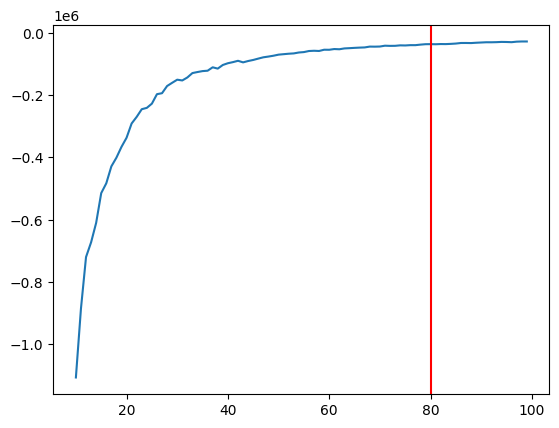

In [93]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10,100), scores)
plt.axvline(80, color='r')

In [94]:
# nous fixons le nombre de clusters à 80
kmeans = KMeans(n_clusters = 80)
kmeans.fit(coords)



centers = kmeans.cluster_centers_
labels = kmeans.labels_

dump(kmeans, '{}/clustering_geoloc.joblib'.format(models_path))


['../../Models/clustering_geoloc.joblib']

In [95]:
import folium


In [96]:
map = folium.Map(location=[0,0], zoom_start=1)

In [97]:
for label , center in zip(labels, centers) :
    folium.Marker(center, 
                  popup = folium.map.Popup(label, parse_html=True),
                  tooltip= folium.map.Tooltip(permanent=True, text='<b>{}</b><br/>({:.2f}/{:.2f})'.format(label, center[0], center[1]), sticky=False),
                  
                  ).add_to(map)


In [98]:
map.save("{}/centroids.html".format(data_path))

In [99]:
map

In [100]:
#sauvegarde du fichier

df = df.drop(['lat','long'], axis = 1)
df.to_csv('{}/accidents_geolocalises.zip'.format(data_path), index = False, compression=dict(method='zip', archive_name='accidents_geolocalises.csv'))

In [101]:
#fin du fichier